# BUSINESS CASE : PRICE AND COST ESCENARIOS

In [186]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Defining variables and constants

First im going to calculate all the structure of the company, stablishing prices, benefits and costs, all this is going to be visualized in some plots

In [187]:
# price of the standard can fish (filete de caballa lydemar)
prices = np.array([2.5 , 3 , 3.5]) 

# costos
box_cost = 110
cans_per_box = 48
can_cost = box_cost / cans_per_box

# cans ordered per person 
number_cans = np.array([6 , 12 , 24 , 48])

# defining business functions
# benefit function includes different scenarios for prices and number_cans
def benefit(x , y , z):
    return ( (prices[y] - can_cost) * number_cans[z] ) * x



t1 = np.arange(prices[0], 1000 , 100)

## Creating graph models

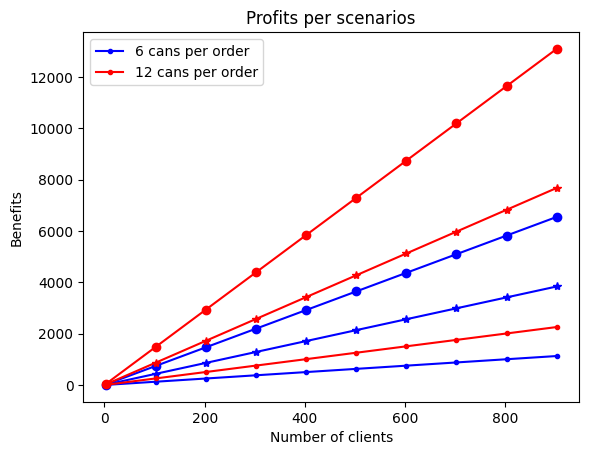

In [208]:

# now that we have the tree scenarios, we can plot tree lines depending if the price is low, medium or high
# 6 cans per order
plt.plot(t1, benefit(t1 , 0 , 0) , marker="." , color = 'blue' , label = '6 cans per order' )
plt.plot(t1, benefit(t1 , 1 , 0) , marker="*" , color = 'blue' )
plt.plot(t1, benefit(t1 , 2 , 0) , marker="o" , color = 'blue' )

# 12 cans per order
plt.plot(t1, benefit(t1 , 0 , 1) , marker="." , color = 'red' , label = '12 cans per order' )
plt.plot(t1, benefit(t1 , 1 , 1) , marker="*" , color = 'red' )
plt.plot(t1, benefit(t1 , 2 , 1) , marker="o" , color = 'red' )


plt.xlabel("Number of clients")
plt.ylabel("Benefits")
plt.title("Profits per scenarios")
plt.legend()
# plt.annotate('Red lines indicate an scenario where people buy 12 cans per order \nblue lines indicate an scenario where people order 6 cans each time', xy = (0, -0.2), xycoords='axes fraction')
plt.show()